In [3]:
import numpy as np
import os

# Obtain best accuracy and bset roc_auc from log files (after data augmentation training)

In [4]:
log_dir0 = '/home/chen_zhang06/HatefulMemes/train_with_new_data'
accs = []
aucs = []
for i in range(27):
    log_dir = f"{log_dir0}/{i}"
    f = open(os.path.join(log_dir, 'train.log'), 'r')
    f = list(f)
    accs.append(float(f[-2].split(',')[3][-6:]))
    aucs.append(float(f[-2].split(',')[5][-7:]))
print(f[-2].split(',')[3][-6:])
print(f[-2].split(',')[5][-7:])
print(f[-2])
print(accs)
print(aucs)

0.7111
0.7675

2021-05-06T05:35:09 | INFO | mmf.trainers.callbacks.logistics : progress: 50/1000, val/hateful_memes/cross_entropy: 0.6078, val/total_loss: 0.6078, val/hateful_memes/accuracy: 0.7111, val/hateful_memes/binary_f1: 0.4658, val/hateful_memes/roc_auc: 0.7675

[0.7148, 0.713, 0.7093, 0.7204, 0.6833, 0.7, 0.7278, 0.7093, 0.7, 0.7037, 0.7185, 0.7037, 0.7333, 0.6963, 0.7278, 0.6778, 0.7241, 0.7204, 0.7148, 0.7111, 0.6852, 0.6926, 0.7185, 0.7204, 0.713, 0.6981, 0.7111]
[0.7365, 0.7479, 0.717, 0.7527, 0.7382, 0.7422, 0.7315, 0.754, 0.745, 0.7394, 0.7379, 0.7513, 0.7419, 0.7657, 0.7514, 0.7345, 0.7556, 0.7464, 0.7348, 0.7606, 0.7596, 0.7453, 0.7556, 0.7584, 0.7572, 0.7598, 0.7675]


# Obtain original accuracy and roc_auc from csv file

In [5]:
import pandas as pd
pd_data = pd.read_csv(os.path.join(log_dir0, 'HyperparameterTuning.csv'))
pd_data

,id,lr_ratio,use_warmup,warmup_factor,warmup_iterations,lr,batch_size,scheduler.num_warmup_steps,scheduler.type,ROC-AUC,Acc.,best iteration
0,18,0.6,True,0.2,1000.0,0.000050,80,500,warmup_cosine,0.7757,0.7315,3150.0
1,19,0.3,True,0.2,1000.0,0.000050,80,250,warmup_cosine,0.7739,0.7241,900.0
2,8,0.3,True,0.7,1000.0,0.000050,80,250,warmup_cosine,0.7695,0.7241,700.0
3,16,0.6,True,0.2,1000.0,0.000050,80,2000,warmup_linear,0.7695,0.7167,2100.0
4,7,0.3,True,0.6,2000.0,0.000050,80,250,warmup_cosine,0.7678,0.7259,2100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
61,62,0.8,True,0.2,1000.0,0.000050,80,250,warmup_cosine,0.7393,0.7130,NaN
62,63,0.6,True,0.2,1000.0,0.000050,80,500,warmup_cosine,0.7389,0.6981,700.0
63,64,0.1,False,0.2,1000.0,0.000005,32,2000,warmup_linear,0.7382,0.7019,NaN
64,65,0.1,False,0.2,1000.0,0.000005,32,2000,warmup_linear,0.7350,0.7037,NaN


In [6]:
acc_orig = pd_data['Acc.'].values[:27]
acc_orig

array([0.7315, 0.7241, 0.7241, 0.7167, 0.7259, 0.7389, 0.7352, 0.713 ,
       0.7241, 0.7259, 0.7204, 0.7259, 0.7315, 0.7222, 0.7185, 0.7278,
       0.6981, 0.7222, 0.7111, 0.713 , 0.7204, 0.7278, 0.7241, 0.7204,
       0.7093, 0.7333, 0.7426])

In [12]:
auc_orig = pd_data['ROC-AUC'].values[:27]
auc_orig
print(auc_orig.mean())

0.7654666666666666


# Make plot

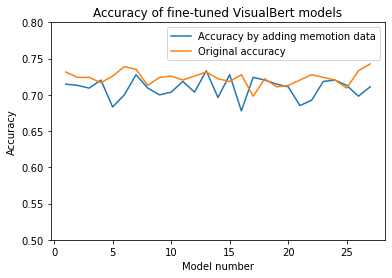

In [13]:
import matplotlib.pyplot as plt
x = list(range(1, 28))
plt.plot(x, accs, label = "Accuracy by adding memotion data")
plt.plot(x, acc_orig, label = "Original accuracy")
plt.xlabel('Model number')
plt.ylabel('Accuracy')
plt.title('Accuracy of fine-tuned VisualBert models')
plt.ylim(0.5, 0.8)
plt.legend()
# plt.show()
os.chdir('/home/chen_zhang06/HatefulMemes/output')
plt.savefig('accu_memotion.png')

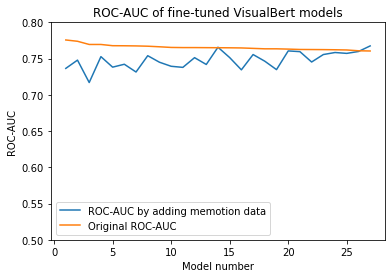

In [14]:
plt.plot(x, aucs, label = "ROC-AUC by adding memotion data")
plt.plot(x, auc_orig, label = "Original ROC-AUC")
plt.xlabel('Model number')
plt.ylabel('ROC-AUC')
plt.title('ROC-AUC of fine-tuned VisualBert models')
plt.ylim(0.5, 0.8)
plt.legend()
# plt.show()
os.chdir('/home/chen_zhang06/HatefulMemes/output')
plt.savefig('AUROC_memotion.png')